<a href="https://colab.research.google.com/github/shubhamawale/playstore-data-analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# creating dataframe from csv file
play_store_data_file_path = '/content/drive/MyDrive/Colab Notebooks/Capstone Project/1st - EDA /Play Store Data.csv'
play_store_df = pd.read_csv(play_store_data_file_path)

#**Exploration of Data**

**checking first five rows**



In [15]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**checking last three rows**

In [16]:
play_store_df.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


**Checking the number of all rows and columns**


In [17]:
play_store_df.shape

(10841, 13)

This play store dataset contain 10841 rows and 13 columns

**taking information about the dataset**

In [18]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Dataset have some null values in some columns and many of them has data type of object

**checking the columns**

In [19]:
play_store_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

**discribing the dataset**

In [20]:
play_store_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


*   This method shows min, max, mean and other term for only those columns whos type is numeric
*   Here we can see max rating is 19 but rating can be only in 1 to 5 so this is a outlier
*    so at time of data cleaning we have to remove these outlier





**checking box plot for dataset**

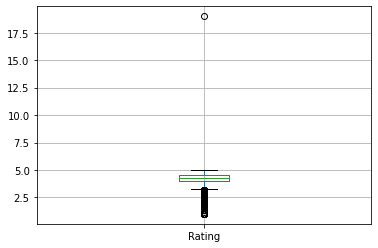

In [21]:
play_store_df.boxplot();

**checking random observation** 

In [22]:
play_store_df.loc[10000]

App                       Mee-EW
Category                   TOOLS
Rating                       NaN
Reviews                        0
Size                         17M
Installs                      5+
Type                        Free
Price                          0
Content Rating          Everyone
Genres                     Tools
Last Updated      August 2, 2018
Current Ver                1.0.1
Android Ver           4.1 and up
Name: 10000, dtype: object

*   We know that many of columns data type is object
*   For operation we need data in numeric form
*   some columns value contains letters in the observation so we have to remove that at the time of data cleaning
*   After that we have to convert it into numeric





# **Data cleaning**

#### **cheking outliear and droping them**

Checking the ouliear which are greater with th column of rating whos rating is greater than five and we will remove that observation

In [23]:
play_store_df[play_store_df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [24]:
play_store_df.drop(10472, inplace=True)

In [25]:
play_store_df[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


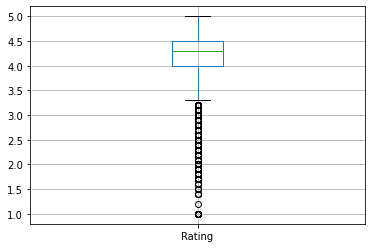

In [26]:
play_store_df.boxplot();

So we saw there is only one observation who had rating 19 and its not possible
Also we saw that other values are also mismatching so we dropped that row and after that we checked it.

####**Checking Null values in dataset and performing data manipulation**

Now we are checking null values from the dataset

In [27]:
play_store_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

*   In the Rating column we got 1474 null values
*   In the Type there is 1 null value
*   In the Current version 8 values are null
*   And in the Android version there are only 2 values are null





For data cleaning
*   In rating we will fill the numerical median value
*   In other categorical column we fill the mode of value

In [28]:
play_store_df['Rating'] = play_store_df['Rating'].fillna(play_store_df['Rating'].median()) 

In [29]:
play_store_df['Type'].fillna(str(play_store_df['Type'].mode()), inplace=True)

In [30]:
play_store_df['Current Ver'].fillna(str(play_store_df['Current Ver'].mode()), inplace=True)

In [31]:
play_store_df['Android Ver'].fillna(str(play_store_df['Android Ver'].mode()), inplace=True)

In [32]:
play_store_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

*   Here we fiiled null value of dataset columns and checked it
*   Now there are no null values




#### **converting data into numeric form**

*   In price column vales contain '$' so we have to remove that
*   After that converting it into numeric

In [33]:
play_store_df['Price'] = play_store_df['Price'].apply(lambda x: x.replace('$',''))

In [34]:
play_store_df['Price'] = pd.to_numeric(play_store_df['Price'])

*   Converting reviewa column from object to numeric

In [35]:
play_store_df['Reviews'] = pd.to_numeric(play_store_df['Reviews'])

*   To convert install column value into numeric we have to remove '+' and ',' 

In [36]:
play_store_df['Installs'] = play_store_df['Installs'].apply(lambda x: x.strip('+'))

In [37]:
play_store_df['Installs'] = pd.to_numeric(play_store_df['Installs'].apply(lambda x: x.replace(',','')))

In [38]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


*   So now our necessary columns is converted into numeric



#### **Converting 'Size' column in one unit and numeric**

*   Checked the duplicate observation and removed them
*   First there are 10840 rows now there are 10357
*   Now our data set is ready to perform oprations

**The values in size column is in Kb and Mb so we will convert all them in Mb and after that in numeric form**

In [39]:
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: float(x))

In [40]:
play_store_df.Size.isnull().any()

True

**As we can see there are some null value so we will take median and adjust them**

In [41]:
play_store_df['Size'] = play_store_df['Size'].fillna(play_store_df['Size'].median())

In [42]:
play_store_df.Size.isnull().any()

False

**So now there are no null values all size column values are filled with the median of size column**

#### **Checking duplicate values in dataset and removing**

*   Checking duplicate value and removing them

In [43]:
play_store_df.duplicated().any()

True

In [44]:
play_store_df[play_store_df.duplicated()].value_counts()

App                                                 Category            Rating  Reviews  Size  Installs   Type  Price  Content Rating  Genres                       Last Updated       Current Ver         Android Ver       
eBay: Buy & Sell this Summer - Discover Deals Now!  SHOPPING            4.4     2788923  13.0  100000000  Free  0.0    Teen            Shopping                     July 30, 2018      Varies with device  Varies with device    3
CBS Sports App - Scores, News, Stats & Watch Live   SPORTS              4.3     91031    13.0  5000000    Free  0.0    Everyone        Sports                       August 4, 2018     Varies with device  5.0 and up            3
Quizlet: Learn Languages & Vocab with Flashcards    EDUCATION           4.6     211856   13.0  10000000   Free  0.0    Everyone        Education                    August 1, 2018     Varies with device  Varies with device    3
Skyscanner                                          TRAVEL_AND_LOCAL    4.5     481546   29.0  10

In [45]:
play_store_df.shape

(10840, 13)

In [46]:
play_store_df.drop_duplicates(inplace=True)

In [47]:
play_store_df.shape

(10357, 13)

In [48]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  float64
 5   Installs        10357 non-null  int64  
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10357 non-null  object 
 12  Android Ver     10357 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


# **Performing operations, getting insights and making graphs**

#### **Apps which have more installs by category wise**



*   First we check how many unique category are there
*   After that we find how much installs are there by category wise
*   And we take the graph between category and installs



In [49]:
play_store_df['Category'].nunique()

33

In [50]:
catg_wise_install = play_store_df.groupby('Category')['Installs'].sum().reset_index()

Text(0, 0.5, 'Downloads----->')

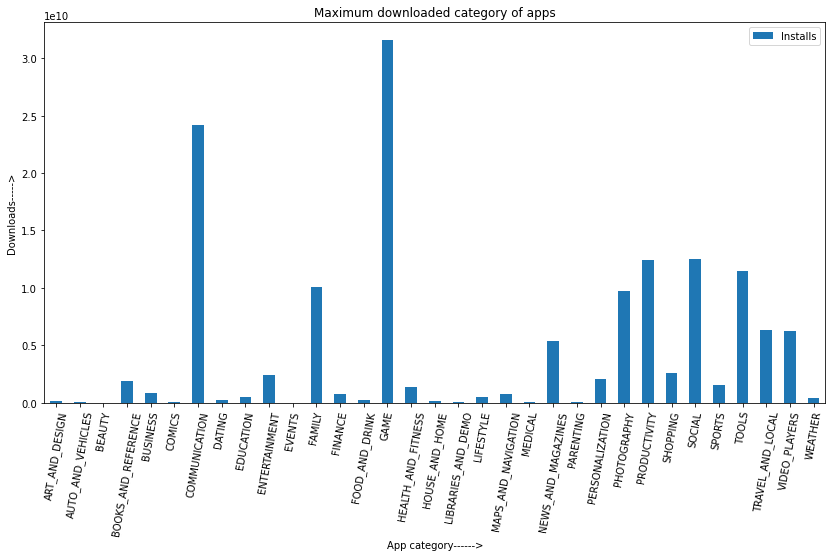

In [51]:
plt.rcParams['figure.figsize'] = (14,7)
catg_wise_install.plot.bar(x='Category',y='Installs')
plt.xticks(rotation=80)
plt.title('Maximum downloaded category of apps')
plt.xlabel('App category------>')
plt.ylabel('Downloads----->')

*   Here we created graph between th app category and their installs 
*   So we saw that game, communication have major installs 



#### **Top 20 genres of apps present on play store**



*   First we should find the no of apps present in every genres
*   Then we will take top 20 apps and their count
*   And we will take the graph between genres and their count



In [52]:
no_of_app_in_genres = play_store_df.Genres.value_counts(ascending=False).reset_index().rename(columns={'index':'Genres','Genres':'App count'})

In [53]:
no_of_app_in_genres.nunique()

Genres       119
App count     62
dtype: int64

In [54]:
top_20_genres = no_of_app_in_genres.head(20)
top_20_genres

,Genres,App count
0,Tools,842
1,Entertainment,588
2,Education,527
3,Business,427
4,Medical,408
5,Productivity,407
6,Personalization,388
7,Lifestyle,372
8,Communication,366
9,Sports,364


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'App count----->')

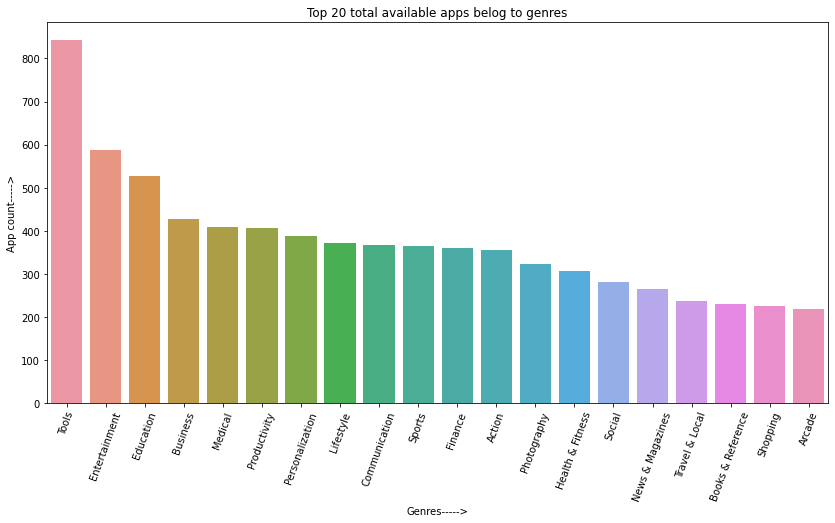

In [55]:
# shows how many apps are present in that genres
sns.barplot(top_20_genres.Genres,top_20_genres['App count']);
plt.xticks(rotation=70)
plt.title('Top 20 total available apps belog to genres')
plt.xlabel('Genres----->')
plt.ylabel('App count----->')
# plt.show()



*   As we can see the graph of genres vs app count
*   In the playstore there are maximum tools apps are present
*   After that entertainment and education apps are present



#### **Top 20 genres and their installs**

In [56]:
genres_installs = play_store_df.groupby(play_store_df['Genres'])['Installs'].sum().reset_index()
# genres_installs

In [57]:
top_20_genres_installs = pd.merge(top_20_genres, genres_installs, how='inner', on='Genres' )
# top_20_genres_installs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Installs----->')

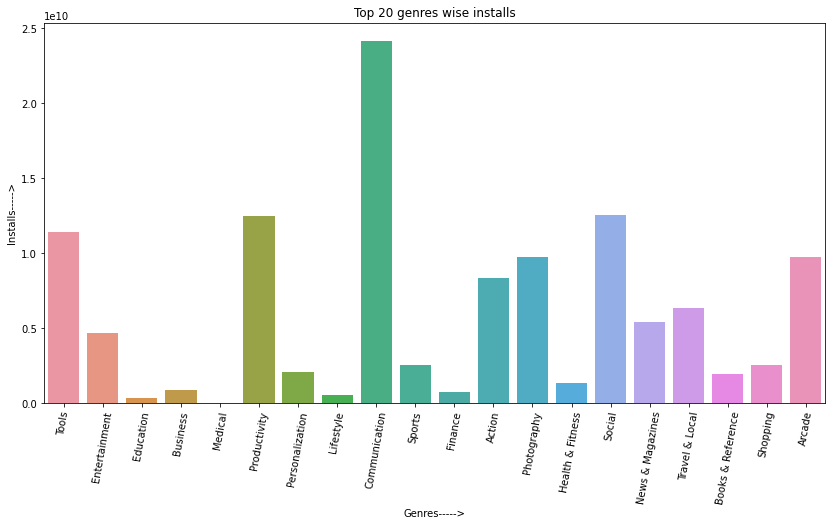

In [58]:
sns.barplot(top_20_genres_installs.Genres,top_20_genres_installs.Installs);
plt.xticks(rotation=80)
plt.title('Top 20 genres wise installs')
plt.xlabel('Genres----->')
plt.ylabel('Installs----->')

#### **Avarage apps installs by category wise**

In [59]:
avg_app_installs = play_store_df.groupby('Category')['Installs'].agg(np.mean)
# avg_app_installs

Text(0, 0.5, 'installs')

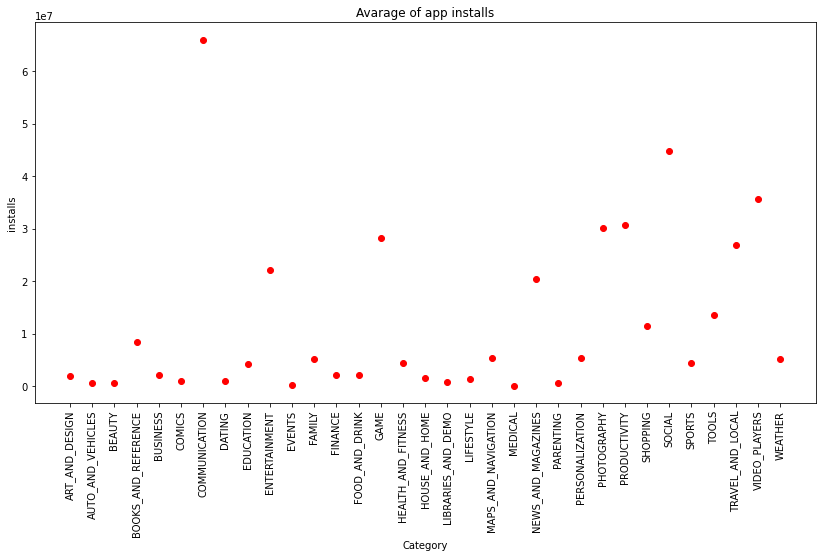

In [60]:
plt.plot(avg_app_installs, 'ro' )
plt.xticks(rotation=90)
plt.title('Avarage of app installs')
plt.xlabel('Category')
plt.ylabel('installs')

#### **Applications present on play store according to their size**

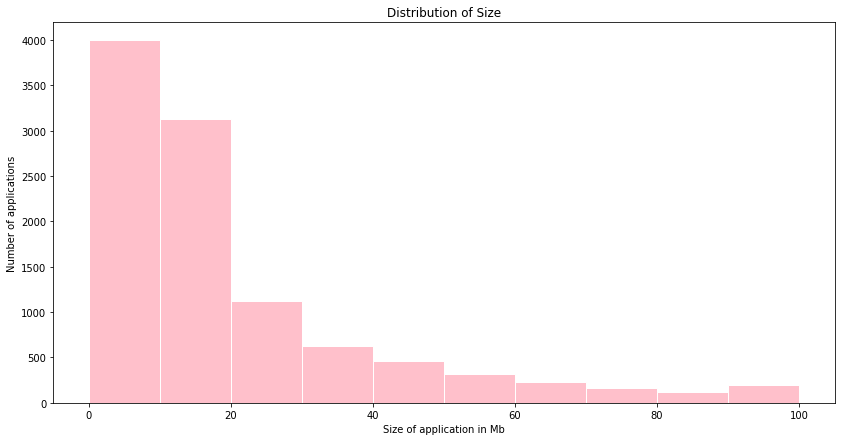

In [63]:
plt.hist(play_store_df['Size'] , color='Pink', edgecolor='White');
plt.xlabel("Size of application in Mb")
plt.ylabel('Number of applications')
plt.title("Distribution of Size")
plt.show()


# **Now we will add the User Review csv file**

> We will merge the User Review dataframe with our play store dataframe using app column


In [68]:
User_review_play_store_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/1st - EDA /User Reviews.csv')

merge_play_store_df = play_store_df.merge(User_review_play_store_df, on='App')

merge_play_store_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

**we got four new columns 'Translated_Review', 'Sentiment', 'Sentiment_Polarity','Sentiment_Subjectivity'.**

> Sentiment basically determines the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral. 

> Sentiment Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

> Sentiment Subjectivity generally refer to personal opinion, emotion or judgment, which lies in the range of [0,1].


#### **Number of installs Sentiment wise according to Genres**



In [65]:
category_sentiment = merge_play_store_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
print(category_sentiment)

category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])

             Category Sentiment  Sentiment Count
0      ART_AND_DESIGN  Negative               61
1      ART_AND_DESIGN   Neutral               62
2      ART_AND_DESIGN  Positive              259
3   AUTO_AND_VEHICLES  Negative               17
4   AUTO_AND_VEHICLES   Neutral               36
..                ...       ...              ...
94      VIDEO_PLAYERS   Neutral               58
95      VIDEO_PLAYERS  Positive              190
96            WEATHER  Negative               33
97            WEATHER   Neutral               35
98            WEATHER  Positive              165

[99 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


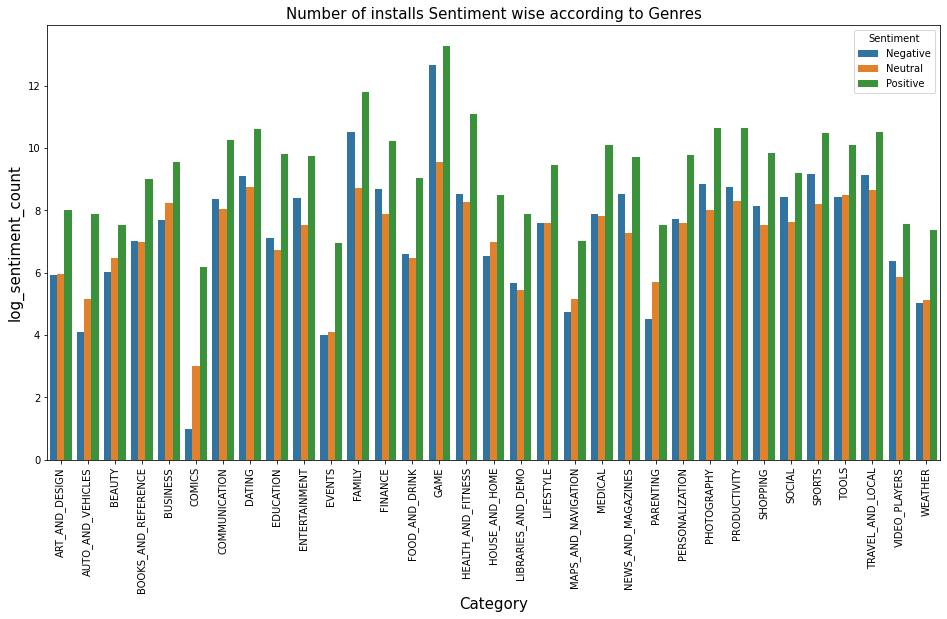

In [66]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Installs", fontsize=15)
plt.title("Number of installs Sentiment wise according to Genres",fontsize=15)
sns.barplot('Category', 'log_sentiment_count', hue='Sentiment', data=category_sentiment);


#### **Subjectivity Graph**

**Now from the next graph we can conclude that maximum number of users give reviews according to their experience**

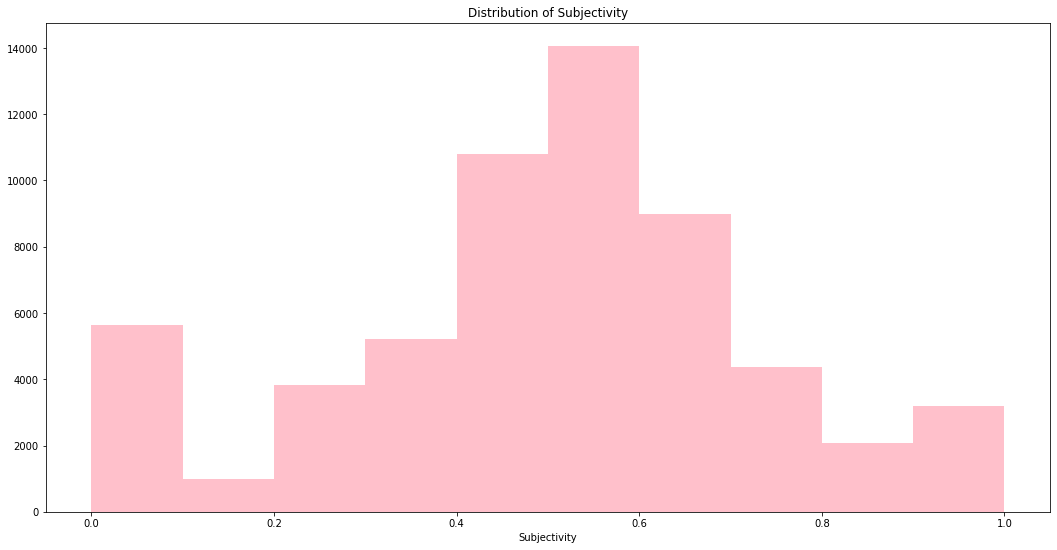

In [69]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merge_play_store_df[merge_play_store_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'] , color='Pink')
plt.show()

# **Conclusion**

Now after compliting our analysis we cac conclude that

*   The game and communication category have maximum installs
*   In play store there maximum tool apps are present
*   Genres wise their are maximum communication apps have installs
*   In avarage app install their are maximum social app have maximum avarage app installs
*   Maximum app have 20 MB size
*   Users installs the application depends according to previous rating and reviews


